## Getting the data

In [12]:
from folktables.acs import ACSDataSource
import pandas as pd
import numpy as np

In [249]:
data_source = ACSDataSource(survey_year='2021', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states = ['CA'],download=True)

In [74]:
CA = pd.read_csv('data/2021/1-Year/psam_p06.csv')
CA.shape

(386061, 287)

In [353]:
# create dict for OCCP
d = {i:'MGR' for i in range(0,441)}
bus = {i:'BUS' for i in range(500,751)}
fin = {i:'FIN' for i in range(800,961)}
cmm = {i:'CMM' for i in range(1005,1241)}
eng = {i:'ENG' for i in range(1305,1561)}
sci = {i:'SCI' for i in range(1600,1981)}
cms = {i:'CMS' for i in range(2001,2061)}
lgl = {i:'LGL' for i in range(2100,2181)}
edu = {i:'EDU' for i in range(2205,2556)}
ent = {i:'ENT' for i in range(2600,2921)}
med = {i:'MED' for i in range(3000,3551)}
hls = {i:'HLS' for i in range(3601,3656)}
prt = {i:'PRT' for i in range(3700,3961)}
eat = {i:'EAT' for i in range(4000,4161)}
cln = {i:'CLN' for i in range(4200,4256)}
prs = {i:'PRS' for i in range(4330,4656)}
sal = {i:'SAL' for i in range(4700,4966)}
off = {i:'OFF' for i in range(5000,5941)}
fff = {i:'FFF' for i in range(6005,6131)}
con = {i:'CON' for i in range(6200,6766)}
ext = {i:'EXT' for i in range(6800,6951)}
rpr = {i:'RPR' for i in range(7000,7641)}
prd = {i:'PRD' for i in range(7700,8991)}
trn = {i:'TRN' for i in range(9005,9761)}
mil = {i:'MIL' for i in range(9800,9831)}
uep = {9920:'UEP'}

dicts = [bus,fin,cmm,eng,sci,cms,lgl,edu,ent,med,hls,prt,eat,cln,prs,sal,off,fff,con,ext,rpr,prd,trn,mil,uep]

for name in dicts:
    d.update(name)


In [354]:
feature_names = ['AGEP', # Age (Continuous)
                 'SEX', # Gender (Binary, 1: male, 2: female)
                 'WKHP', # Hours-per-week (Continuous)
                 'COW', # Workclass (Categorical, nominal)
                 'SCHL', # Educational attainment (Categorical, ordinal)
                 'MAR', # Marital status (Categorical, nominal)
                 'RAC1P', # Recoded detailed race code (Categorical, nominal)
                 'WAOB', # World area of birth (Categorical, nominal) (native-country)
                 'OCCP', # Occupation (Categorical, nominal)
                 'INTP', # Interests, dividends and net rental income (Continuous) (capital gain - capital loss)
                 'RELSHIPP', # Relationship (Categorical, nominal)
                 #'ESR', # Employment status recode (Categorical, nominal) (extra)
                 #'MSP', # Other marital status (Categorical, nominal) (extra)
                 #'POBP', # Place of birth (native-country) (Categorical, nominal) (delete)
                 'CIT' # Citizenship status (Categorical, nominal) (extra)
                ]

target_name = "PINCP" # Total person's income (Continuous)

def data_processing(data, features, target_name:str, threshold: float = 35000):
    df = data
    ### Adult Filter (from Foltktables)
    df = df[df['AGEP'] > 16]
    df = df[df['PINCP'] > 100]
    df = df[df['WKHP'] > 0]
    df = df[df['PWGTP'] >= 1]

    ### Target
    #df["target"] = df[target_name] > threshold
    #target = df["target"].values
    df = df[features + [target_name]] ##we want to keep df before one_hot encoding to make Bias Analysis

    ### Reducing OCCP
    df['OCCP'] = df['OCCP'].map(d)

    return df


In [355]:
CA = data_processing(CA, feature_names, target_name)
#CA.to_csv('data/2021/1-Year/CA_new.csv', index = False)

In [75]:
CA = pd.read_csv('aasmc-exam/data/folktables_data/CA_new.csv')

In [76]:
CA.shape

(192223, 13)

## EDA

In [5]:
categorical=CA[['SEX','COW','SCHL','MAR','RAC1P','WAOB','OCCP','RELSHIPP','CIT']]
numerical=CA[['AGEP','WKHP','INTP','PINCP']]

In [73]:
sorted(['SEX','COW','SCHL','MAR','RAC1P','WAOB','OCCP','RELSHIPP','CIT','AGEP','WKHP','INTP','PINCP'])

['AGEP',
 'CIT',
 'COW',
 'INTP',
 'MAR',
 'OCCP',
 'PINCP',
 'RAC1P',
 'RELSHIPP',
 'SCHL',
 'SEX',
 'WAOB',
 'WKHP']

In [6]:
#Distributions of categorical attributes in numbers
CA[['AGEP','WKHP','INTP','SEX','COW','SCHL','MAR','RAC1P','WAOB','RELSHIPP','CIT','PINCP']] = CA[['AGEP','WKHP','INTP','SEX','COW','SCHL','MAR','RAC1P','WAOB','RELSHIPP','CIT','PINCP']].astype(int)

for cat in categorical.columns:
    print(cat)
    for i in CA[cat].unique():
        print(i,':',round(CA[cat].value_counts()[i]/CA[cat].value_counts().sum(),2))

SEX
2 : 0.47
1 : 0.53
COW
5 : 0.03
1 : 0.64
2 : 0.08
4 : 0.04
3 : 0.09
6 : 0.08
7 : 0.04
8 : 0.0
SCHL
21 : 0.25
20 : 0.08
19 : 0.14
18 : 0.06
17 : 0.02
8 : 0.0
22 : 0.11
16 : 0.17
15 : 0.02
14 : 0.01
13 : 0.01
12 : 0.01
5 : 0.0
11 : 0.01
23 : 0.03
9 : 0.01
1 : 0.02
24 : 0.02
6 : 0.0
4 : 0.0
10 : 0.0
7 : 0.0
3 : 0.0
2 : 0.0
MAR
5 : 0.37
1 : 0.51
4 : 0.02
3 : 0.09
2 : 0.02
RAC1P
1 : 0.42
9 : 0.17
8 : 0.17
2 : 0.04
6 : 0.19
3 : 0.01
7 : 0.0
5 : 0.0
4 : 0.0
WAOB
1 : 0.66
5 : 0.02
3 : 0.15
6 : 0.01
2 : 0.0
4 : 0.15
7 : 0.0
8 : 0.0
OCCP
ENT : 0.03
SAL : 0.09
SCI : 0.02
CLN : 0.03
OFF : 0.11
EAT : 0.05
PRT : 0.02
FFF : 0.01
PRD : 0.04
EDU : 0.06
MIL : 0.0
CON : 0.04
RPR : 0.03
HLS : 0.04
MGR : 0.11
BUS : 0.04
PRS : 0.02
LGL : 0.01
TRN : 0.07
CMS : 0.02
CMM : 0.04
ENG : 0.03
MED : 0.05
FIN : 0.02
EXT : 0.0
RELSHIPP
38 : 0.02
37 : 0.0
20 : 0.46
22 : 0.04
25 : 0.14
34 : 0.03
21 : 0.21
36 : 0.01
28 : 0.02
29 : 0.01
32 : 0.01
26 : 0.0
30 : 0.01
31 : 0.0
33 : 0.02
27 : 0.01
23 : 0.0
24 : 0.0
35 : 0

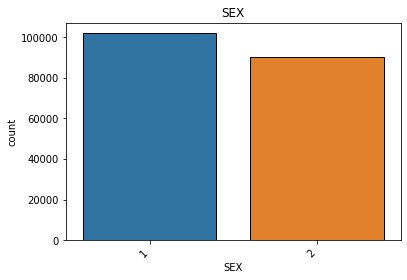

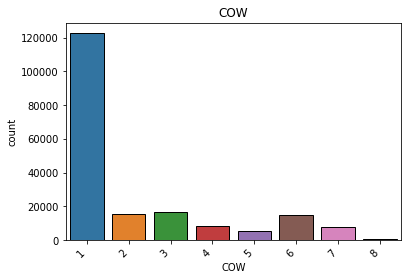

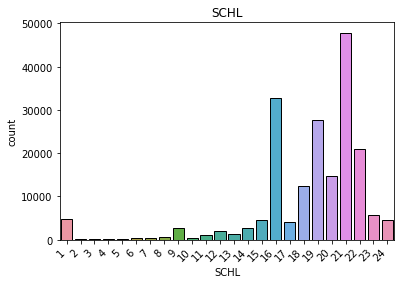

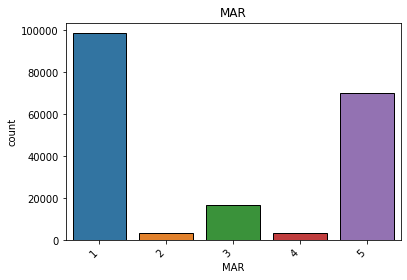

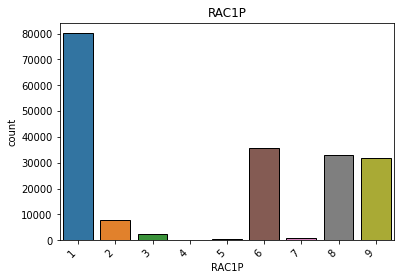

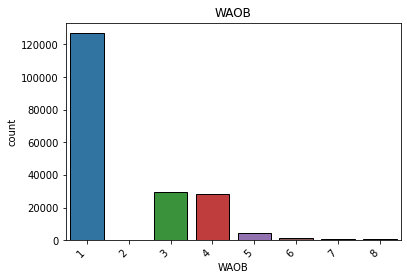

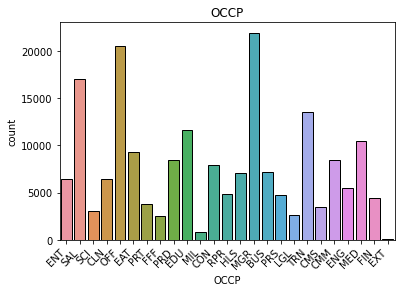

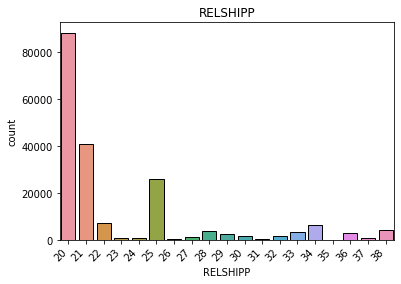

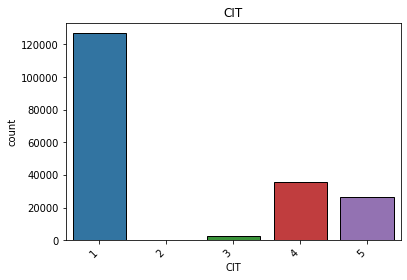

In [8]:
# Distributions of categorical attributes in plots

import seaborn as sns
import matplotlib.pyplot as plt
def plot_dist(df,x,title,xlabel):
    ax = sns.countplot(x = df[x], dodge = True, edgecolor='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    plt.show()
    #plt.savefig('img/'+file, bbox_inches="tight")

for cat in categorical.columns:
    plot_dist(CA,cat,cat,cat)

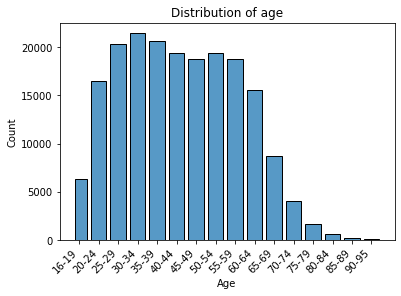

In [9]:
# Distribution of age
b = [16,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
t = [x-2.5 for x in b[1:]]

ax = sns.histplot(x = CA['AGEP'], bins= b, multiple="dodge",shrink=.8)
ax.set_xticks(t)
ax.set_xticklabels(['16-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69',
                   '70-74','75-79','80-84','85-89','90-95'], rotation=45, horizontalalignment='right')
ax.set_title('Distribution of age')
ax.set_xlabel('Age')
plt.show()
#plt.savefig('img/age.png',bbox_inches="tight")

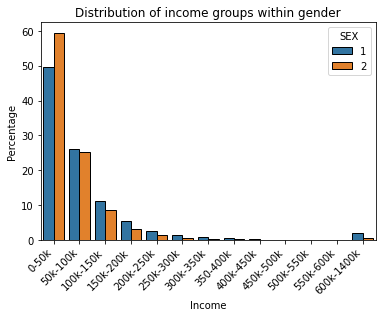

In [21]:
# Distribution of income

d = {0:0,1:50000,2:100000,3:150000,4:200000,5:250000,6:300000,7:350000,8:400000,9:450000,10:500000,11:550000,12:600000}
CA['inc_group'] = CA['PINCP'].apply(lambda x: [k for k,v in d.items() if int(x) > v][-1])
groups = ['0-50k','50k-100k','100k-150k','150k-200k','200k-250k','250k-300k','300k-350k','350-400k',
                    '400k-450k','450k-500k','500k-550k','550k-600k','600k-1400k']


# pct of income group within gender
dd = pd.DataFrame(round((CA.groupby('SEX')['inc_group'].value_counts() / CA.groupby('SEX')['inc_group'].size() *100),2))
dd = dd.rename(columns={'inc_group':'percent'})
dd = dd.reset_index()

ax = sns.barplot(x = dd['inc_group'],y=dd['percent'], hue = dd['SEX'],edgecolor='black')
ax.set_xticklabels(groups, rotation=45, horizontalalignment='right')

ax.set_title('Distribution of income groups within gender')
ax.set_xlabel('Income')
ax.set_ylabel('Percentage')
#plt.savefig('img/income.png',bbox_inches="tight")
plt.show()

In [77]:
# distribution of WKHP
CA.WKHP.value_counts()

40.0    97156
50.0    12828
30.0     9807
20.0     9236
45.0     6731
        ...  
87.0        3
83.0        3
94.0        2
93.0        2
89.0        1
Name: WKHP, Length: 98, dtype: int64

In [78]:
# distribution of INTP
CA.INTP.value_counts()

 0.0         170657
-2400.0        1126
 1000.0         950
 100.0          825
 5000.0         786
              ...  
 162000.0         1
 137000.0         1
 30800.0          1
 117000.0         1
 27300.0          1
Name: INTP, Length: 600, dtype: int64

## Checking dependencies

In [ ]:
CA.dtypes
#CA[['AGEP','WKHP','INTP','SEX','COW','SCHL','MAR','RAC1P','WAOB','RELSHIPP','CIT']] = CA[['AGEP','WKHP','INTP','SEX','COW','SCHL','MAR','RAC1P','WAOB','RELSHIPP','CIT']].astype(int)
#CA[['SEX','COW','SCHL','MAR','RAC1P','WAOB','OCCP','RELSHIPP','CIT']] = CA[['SEX','COW','SCHL','MAR','RAC1P','WAOB','OCCP','RELSHIPP','CIT']].astype('category')

In [22]:
corr = numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,AGEP,WKHP,INTP,PINCP
AGEP,1.000000,0.052337,0.097908,0.210249
WKHP,0.052337,1.000000,0.007946,0.279938
INTP,0.097908,0.007946,1.000000,0.375804
PINCP,0.210249,0.279938,0.375804,1.000000


In [58]:
from scipy.stats import chi2_contingency
from itertools import combinations

mat = pd.DataFrame(index = categorical.columns, columns = categorical.columns)
cc = list(combinations(categorical.columns,2))
for comb in cc:
    contigency= pd.crosstab(categorical[comb[0]], categorical[comb[1]])
    c, p, dof, expected = chi2_contingency(contigency)
    mat.loc[comb[0],comb[1]] = '{0:.0f}'.format(c),'{0:.2f}'.format(p)
  

In [59]:
mat

,SEX,COW,SCHL,MAR,RAC1P,WAOB,OCCP,RELSHIPP,CIT
SEX,NaN,"(4543, 0.00)","(1878, 0.00)","(2579, 0.00)","(294, 0.00)","(391, 0.00)","(32093, 0.00)","(1250, 0.00)","(472, 0.00)"
COW,NaN,NaN,"(11692, 0.00)","(3731, 0.00)","(3528, 0.00)","(2882, 0.00)","(96272, 0.00)","(11719, 0.00)","(3489, 0.00)"
SCHL,NaN,NaN,NaN,"(9016, 0.00)","(34290, 0.00)","(54525, 0.00)","(142549, 0.00)","(25281, 0.00)","(30073, 0.00)"
MAR,NaN,NaN,NaN,NaN,"(4956, 0.00)","(9166, 0.00)","(8792, 0.00)","(104332, 0.00)","(9801, 0.00)"
RAC1P,NaN,NaN,NaN,NaN,NaN,"(179282, 0.00)","(30093, 0.00)","(10094, 0.00)","(49966, 0.00)"
WAOB,NaN,NaN,NaN,NaN,NaN,NaN,"(34236, 0.00)","(11932, 0.00)","(382305, 0.00)"
OCCP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(26126, 0.00)","(17782, 0.00)"
RELSHIPP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(13004, 0.00)"
CIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
print(mat.to_latex(na_rep = '-', bold_rows = True)) 

\begin{tabular}{llllllllll}
\toprule
{} & SEX &           COW &           SCHL &           MAR &          RAC1P &            WAOB &            OCCP &        RELSHIPP &             CIT \\
\midrule
\textbf{SEX     } &   - &  (4543, 0.00) &   (1878, 0.00) &  (2579, 0.00) &    (294, 0.00) &     (391, 0.00) &   (32093, 0.00) &    (1250, 0.00) &     (472, 0.00) \\
\textbf{COW     } &   - &             - &  (11692, 0.00) &  (3731, 0.00) &   (3528, 0.00) &    (2882, 0.00) &   (96272, 0.00) &   (11719, 0.00) &    (3489, 0.00) \\
\textbf{SCHL    } &   - &             - &              - &  (9016, 0.00) &  (34290, 0.00) &   (54525, 0.00) &  (142549, 0.00) &   (25281, 0.00) &   (30073, 0.00) \\
\textbf{MAR     } &   - &             - &              - &             - &   (4956, 0.00) &    (9166, 0.00) &    (8792, 0.00) &  (104332, 0.00) &    (9801, 0.00) \\
\textbf{RAC1P   } &   - &             - &              - &             - &              - &  (179282, 0.00) &   (30093, 0.00) &   (10094, 0.00) 

In [42]:
# example printed out for chi2 test
ct = pd.crosstab(categorical['SEX'], categorical['COW'])
df=chi2_contingency(ct)[3]

#expected values
ct_exp = pd.DataFrame(
    data=df[:,:], 
    index=[1,2],
    columns=[1,2,3,4,5,6,7,8]
).round(1)
ct_exp

,1,2,3,4,5,6,7,8
1,65147.6,8273.5,8884.1,4356.3,2987.9,8013.3,4117.4,289.9
2,57541.4,7307.5,7846.9,3847.7,2639.1,7077.7,3636.6,256.1


In [37]:
chi2_contingency(ct)

(4543.050711451615,
 0.0,
 7,
 array([[65147.59539701,  8273.4775235 ,  8884.12505267,  4356.30637333,
          2987.92491013,  8013.28857629,  4117.35734017,   289.92482689],
        [57541.40460299,  7307.5224765 ,  7846.87494733,  3847.69362667,
          2639.07508987,  7077.71142371,  3636.64265983,   256.07517311]]))

In [43]:
# observed values
ct = pd.crosstab(categorical['SEX'], categorical['COW'])
ct

COW,1,2,3,4,5,6,7,8
SEX,,,,,,,,
1,68813,5732,6313,3779,3600,8637,4901,295
2,53876,9849,10418,4425,2027,6454,2853,251


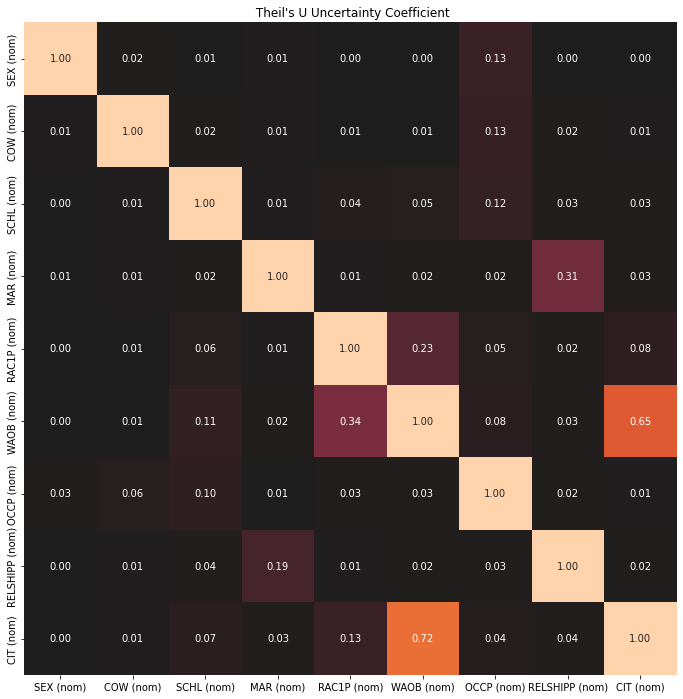

In [34]:
from dython import nominal
cat = ['SEX','COW','SCHL','MAR','RAC1P','WAOB','OCCP','RELSHIPP','CIT']
fig, ax = plt.subplots(figsize=(12, 12))
nominal.associations(categorical, nominal_columns=cat, figsize=(10,10),mark_columns=True, 
                     cbar=False , title=" Theil's U Uncertainty Coefficient",nom_nom_assoc="theil",ax=ax)
fig.savefig('img/corr_theils_U.png',bbox_inches="tight")
#plt.show()

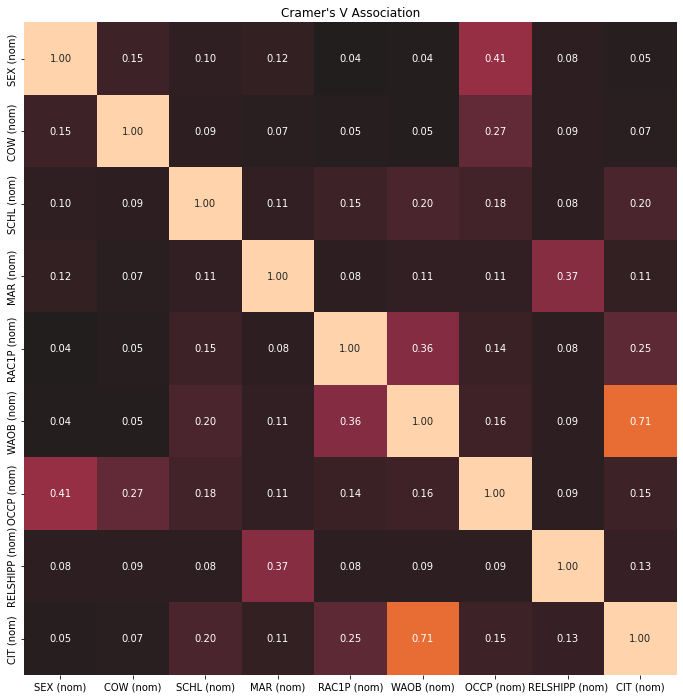

In [35]:
cat = ['SEX','COW','SCHL','MAR','RAC1P','WAOB','OCCP','RELSHIPP','CIT']
fig, ax = plt.subplots(figsize=(12, 12))
nominal.associations(categorical, nominal_columns=cat, figsize=(10,10),mark_columns=True, 
                     cbar=False , title="Cramer's V Association",nom_nom_assoc="cramer",ax=ax,
                    cramers_v_bias_correction=True)
fig.savefig('img/corr_cramers_V.png',bbox_inches="tight")
#plt.show()